<a href="https://colab.research.google.com/github/XenaCornils/Natural-Language-Processing/blob/main/Processamento_de_Abstracts_Turma_de_Processamento_de_Linguagem_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Introdução à Aula: Processamento de Linguagem Natural para Análise de Abstracts.
Nesta aula, vamos explorar como aplicar técnicas de Processamento de Linguagem Natural (PLN) para analisar um conjunto de abstracts científicos coletados a partir de palavras-chave definidas pelos próprios alunos.

O objetivo é utilizar ferramentas computacionais para:

Extrair informações relevantes dos resumos,

Identificar padrões e agrupamentos (clusters) temáticos,

E visualizar os resultados por meio de nuvens de palavras e redes de coocorrência.

Durante a atividade, será fornecido um código Python comentado, com explicações linha por linha. O aluno deverá acompanhar o código atentamente, lendo os comentários e entendendo o que cada parte está fazendo. O foco é no aprendizado passo a passo.

💬 Atenção! Qualquer dúvida ou dificuldade pode (e deve) ser trazida à professora, que estará disponível para ajudar em todo o processo.

Ao final, espera-se que cada aluno ou grupo consiga:

Analisar os textos de acordo com suas palavras-chave,

Aplicar técnicas de vetorização e clusterização,

E apresentar insights obtidos por meio das ferramentas de PLN estudadas.

Vamos juntos transformar dados textuais em conhecimento!

In [ ]:
# 📌 Etapa 1: Instalar bibliotecas necessárias
# pandas: manipulação de dados
# openpyxl: leitura de arquivos Excel modernos (.xlsx)
# spacy: processamento de linguagem natural

!pip install pandas openpyxl spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# 📌 Etapa 2: Importar bibliotecas principais
import pandas as pd
import spacy
from google.colab import files

# 📌 Etapa 3: Upload do arquivo Excel
uploaded = files.upload()  # Faça upload de savedrecs.xlsx

# 📌 Etapa 4: Carregar o Excel
df = pd.read_excel('savedrecs.xlsx')
df.head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# 📌 Etapa 5: Carregar modelo do spaCy
nlp = spacy.load("en_core_web_sm")

# Se a coluna do abstract for a 22ª (índice 21)
abstracts = df.iloc[:, 21].astype(str)

In [ ]:
# Lista de palavras que você quer excluir de todas as análises
palavras_excluidas = {
    "nasa", "task", "load", "index", "ar", "augmented", "reality",
    "performance", "experiment", "information", "operator", "test"
}

def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
        and token.lemma_ not in palavras_excluidas
    ]
    return " ".join(tokens)

In [ ]:
# 📌 Etapa 6: Função de pré-processamento com spaCy
def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return " ".join(tokens)

In [ ]:
# 📌 Etapa 7: Aplicar o pré-processamento
df['processed_abstract'] = abstracts.apply(spacy_preprocess)

# 📌 Etapa 8: Visualizar resultados
df[['processed_abstract']].head()

,processed_abstract
0,augmented reality ar show improve productivity...
1,information technology exist enable thing fami...
2,augmented reality ar technology introduce manu...
3,augmented reality ar evolve pervasive tool int...
4,study introduce experimental paradigm usabilit...


In [ ]:
# 📌 Etapa 9: Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Criar o vetorizador TF-IDF (máximo de 1000 palavras mais relevantes)
vectorizer = TfidfVectorizer(max_features=1000)

# Transformar os abstracts em uma matriz esparsa TF-IDF
X = vectorizer.fit_transform(df['processed_abstract'])

# Mostrar o formato da matriz: (número de textos, número de palavras)
print("Formato da matriz TF-IDF:", X.shape)

# Ver as 20 primeiras palavras vetorizadas
feature_names = vectorizer.get_feature_names_out()
print("Exemplos de palavras vetorizadas:", feature_names[:20])

Formato da matriz TF-IDF: (18, 905)
Exemplos de palavras vetorizadas: ['able' 'academy' 'accord' 'account' 'accuracy' 'accurate' 'achieve'
 'acquisition' 'activity' 'add' 'addition' 'additional' 'additionally'
 'address' 'administration' 'adopt' 'adoption' 'advanced' 'advancement'
 'advantage']


NameError: name 'feature_names' is not defined

In [ ]:
# 📌 Etapa 10: Aplicar K-Means com número definido de clusters (ex: 3)
from sklearn.cluster import KMeans

k = 3  # Você pode ajustar esse número após a etapa 11
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Atribuir os rótulos (clusters) ao DataFrame
df['cluster'] = kmeans.labels_

# Mostrar quantos abstracts em cada cluster
df['cluster'].value_counts()

,count
cluster,
2,10
1,6
0,2


In [ ]:
# 📌 Etapa 11: Avaliação da qualidade da clusterização
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score para k = {k}: {score:.3f}")

Silhouette Score para k = 3: 0.008


❌ Não, um Silhouette Score de 0.008 é muito baixo.
📊 O que significa esse valor?
O Silhouette Score varia entre:

+1: clusters muito bem definidos;

0: clusters sobrepostos ou mal definidos;

< 0: dados agrupados no cluster errado.

🔎 Score de 0.008 indica que:

Os clusters estão quase indistintos;

Provavelmente, o número de clusters (k) não é ideal ou os textos são muito semelhantes (sem diversidade temática suficiente).

Silhouette Score para k = 2: 0.0186
Silhouette Score para k = 3: 0.0084
Silhouette Score para k = 4: 0.0087
Silhouette Score para k = 5: 0.0114
Silhouette Score para k = 6: 0.0081
Silhouette Score para k = 7: 0.0085
Silhouette Score para k = 8: 0.0085
Silhouette Score para k = 9: 0.0099
Silhouette Score para k = 10: 0.0099


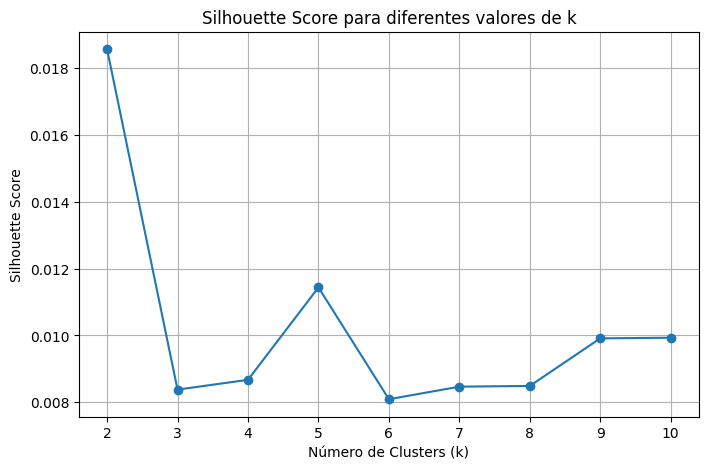

In [ ]:
# 📌 Etapa 12: Avaliar vários valores de k com Silhouette Score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Testar valores de k de 2 a 10
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score para k = {k}: {score:.4f}")

# 📈 Plotar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score para diferentes valores de k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.show()

✅ Interpretação
Embora todos os valores sejam baixos, k = 2 foi o melhor entre os testados.

Isso sugere que sua base tem pouca separabilidade temática clara — ou seja, os abstracts são parecidos demais ou o vocabulário é muito homogêneo.

Mesmo assim, vale aplicar o K-Means com k=2 para explorar o que diferencia esses dois grupos.

Isso ressalta : A dificuldade de clusterizar textos curtos com pouca variabilidade;

A importância do pré-processamento e do número de palavras (features);

Como o contexto e objetivo da análise influenciam a escolha de k (não apenas o score).

Mas vamos reaplicar o K-Means com k=2

In [ ]:
# Etapa 10 com k ajustado
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Atribuir os rótulos (clusters) ao DataFrame
df['cluster'] = kmeans.labels_

# Visualizar quantidade de textos por cluster
df['cluster'].value_counts()

,count
cluster,
0,16
1,2


Foram gerados apenas 2 clusteres

🎨 Etapa 13: Geração de nuvem de palavras por cluster
Usaremos a biblioteca wordcloud para visualizar as palavras mais frequentes de cada grupo.

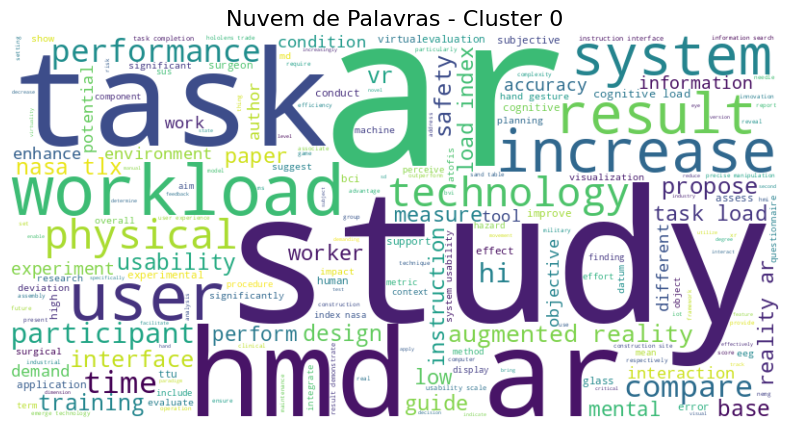

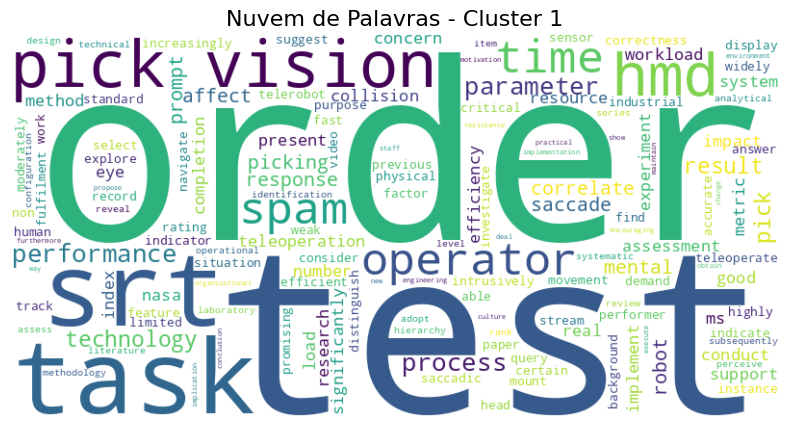

In [ ]:
# Instalar a biblioteca se necessário
!pip install wordcloud

# 📌 Etapa 13: Geração de nuvem de palavras por cluster
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar a nuvem de palavras de um cluster específico
def gerar_nuvem(cluster_id):
    textos = df[df['cluster'] == cluster_id]['processed_abstract']
    texto_concatenado = " ".join(textos)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_concatenado)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Nuvem de Palavras - Cluster {cluster_id}', fontsize=16)
    plt.show()

# Gerar nuvem para cada cluster
for i in df['cluster'].unique():
    gerar_nuvem(i)

🔎 Etapa 14: Exibição de exemplos de abstracts por cluster

In [ ]:
# 📌 Etapa 14: Exibir alguns abstracts por cluster

# Número de exemplos por cluster (ajustável)
n_exemplos = 2

# Mostrar abstracts originais por cluster
for i in df['cluster'].unique():
    print(f"\n📚 Exemplos do Cluster {i}:\n" + "-"*30)
    exemplos = df[df['cluster'] == i].iloc[:n_exemplos]
    for idx, row in exemplos.iterrows():
        print(f"\nTítulo: {row[0]}\nAbstract:\n{row.iloc[21]}\n")


📚 Exemplos do Cluster 0:
------------------------------

Título: J
Abstract:
Augmented reality (AR) has been shown to improve productivity in industry, but its adverse effects (e.g., headaches, eye strain, nausea, and mental workload) on users warrant further investigation. The objective of this study is to investigate the effects of different instruction methods (i.e., HoloLens AR-based and paper-based instructions) and task complexity (low and high-demanding tasks) on cognitive workloads and performance. Twenty-eight healthy males with a mean age of 32.12 (SD 2.45) years were recruited in this study and were randomly divided into two groups. The first group performed the experiment using AR-based instruction, and the second group used paper-based instruction. Performance was measured using total task time (TTT). The cognitive workload was measured using the power of electroencephalograph (EEG) features and the NASA task load index (NASA TLX). The results showed that using AR instruc

<ipython-input-41-4906d3c65dfc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nTítulo: {row[0]}\nAbstract:\n{row.iloc[21]}\n")


🔗 Etapa 15: Rede de Coocorrência de Palavras por Cluster
Usaremos:

CountVectorizer para contar as palavras;

networkx para montar o grafo;

matplotlib para exibir a visualização.



In [ ]:
# 📌 Etapa 15: Instalar bibliotecas adicionais
!pip install networkx scikit-learn

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import itertools

# Função para criar grafo de coocorrência por cluster
def grafo_coocorrencia(cluster_id, top_n=30):
    # Filtrar textos do cluster
    textos = df[df['cluster'] == cluster_id]['processed_abstract']

    # Usar CountVectorizer para tokenizar e contar palavras
    vectorizer = CountVectorizer(max_features=top_n, stop_words='english')
    X_counts = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()

    # Criar pares de palavras que aparecem juntos
    cooc_matrix = (X_counts.T @ X_counts).toarray()

    # Criar grafo
    G = nx.Graph()

    for i in range(len(vocab)):
        for j in range(i + 1, len(vocab)):
            weight = cooc_matrix[i][j]
            if weight > 0:
                G.add_edge(vocab[i], vocab[j], weight=weight)

    # Visualizar
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5)
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]

    nx.draw(G, pos, with_labels=True, width=weights, node_color='skyblue', edge_color='gray', font_size=12)
    plt.title(f"Grafo de Coocorrência - Cluster {cluster_id}", fontsize=16)
    plt.show()

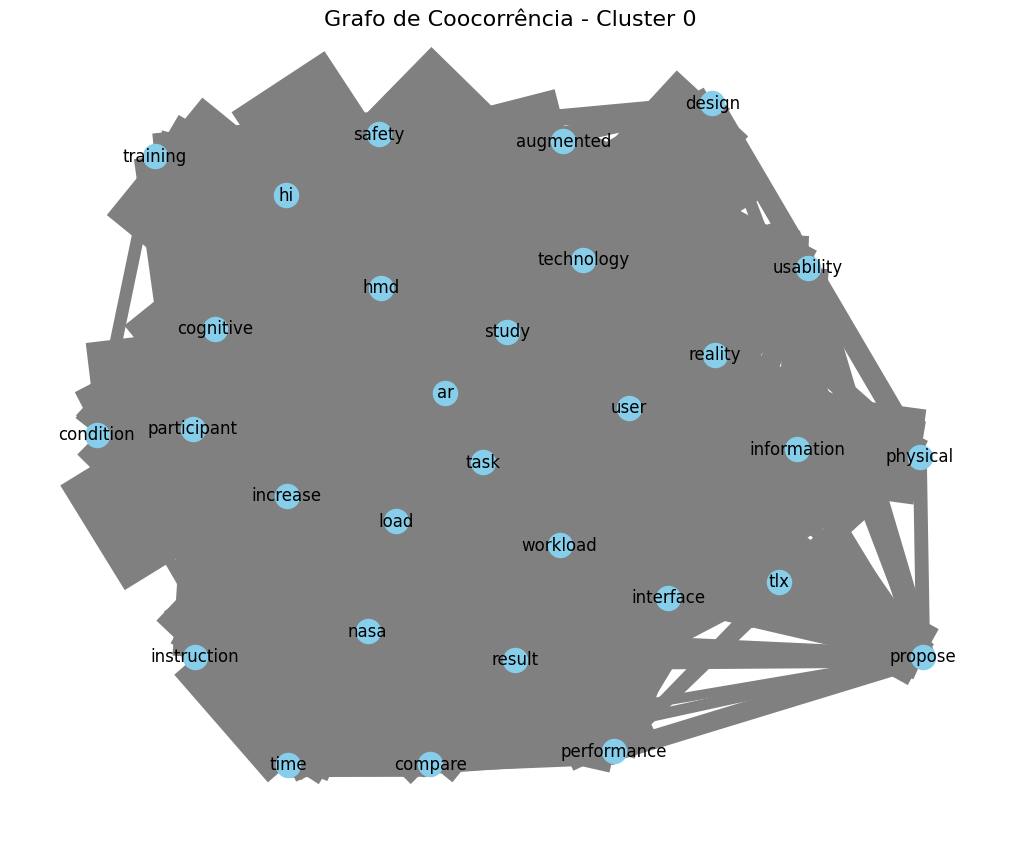

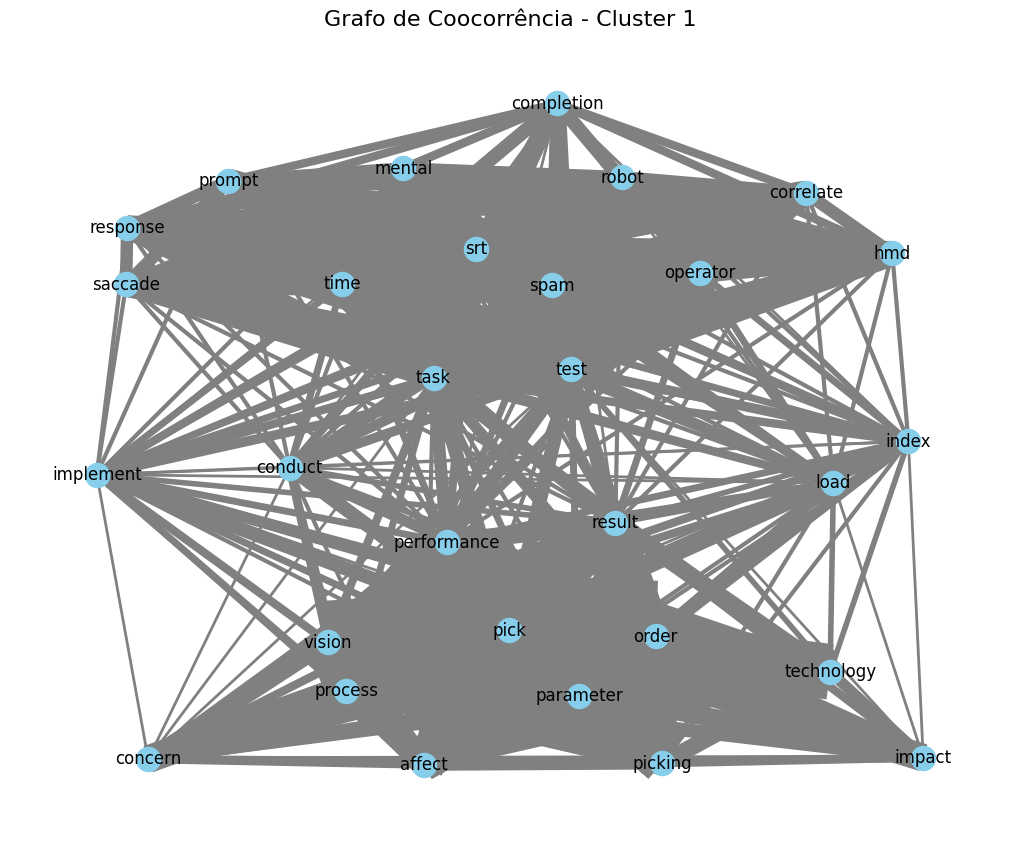

In [ ]:
# Gerar grafo para cada cluster
for i in df['cluster'].unique():
    grafo_coocorrencia(cluster_id=i, top_n=30)

📌 O que está sendo feito?
A função CountVectorizer conta a frequência das palavras por documento.

A matriz de coocorrência é calculada: palavras que aparecem juntas nos mesmos abstracts.

O grafo (networkx) é gerado com arestas entre palavras que aparecem juntas.

A espessura da linha representa a força da coocorrência (quantas vezes as palavras aparecem juntas).

🎯 Problemas na imagem:
Está muito densa porque:

Todas as palavras estão conectadas entre si;

Faltam filtros para mostrar apenas coocorrências mais relevantes;

Os rótulos estão aglomerados, dificultando a leitura

✅ Como melhorar:
Filtrar conexões fracas (exibir apenas se peso > 1 ou 2).

Aumentar o layout repulsivo (k) para espaçar os nós.

Colorir os nós por centralidade, aumentar os mais importantes.

Usar labels maiores e setar tamanho de figura maior.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def grafo_coocorrencia_melhorado(cluster_id, top_n=30, peso_minimo=2):
    textos = df[df['cluster'] == cluster_id]['processed_abstract']

    # Vetorização
    vectorizer = CountVectorizer(max_features=top_n, stop_words='english')
    X_counts = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()
    cooc_matrix = (X_counts.T @ X_counts).toarray()

    # Grafo
    G = nx.Graph()
    for i in range(len(vocab)):
        for j in range(i + 1, len(vocab)):
            weight = cooc_matrix[i][j]
            if weight >= peso_minimo:
                G.add_edge(vocab[i], vocab[j], weight=weight)

    # Visualização
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=0.7, seed=42)  # espaçamento maior entre os nós

    # Tamanho dos nós com base no grau
    node_sizes = [1000 * nx.degree(G, node) for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes)
    nx.draw_networkx_edges(G, pos, width=1, edge_color='gray', alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    plt.title(f'🌐 Grafo de Coocorrência - Cluster {cluster_id}', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

<ipython-input-45-e796406f22ed>:35: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


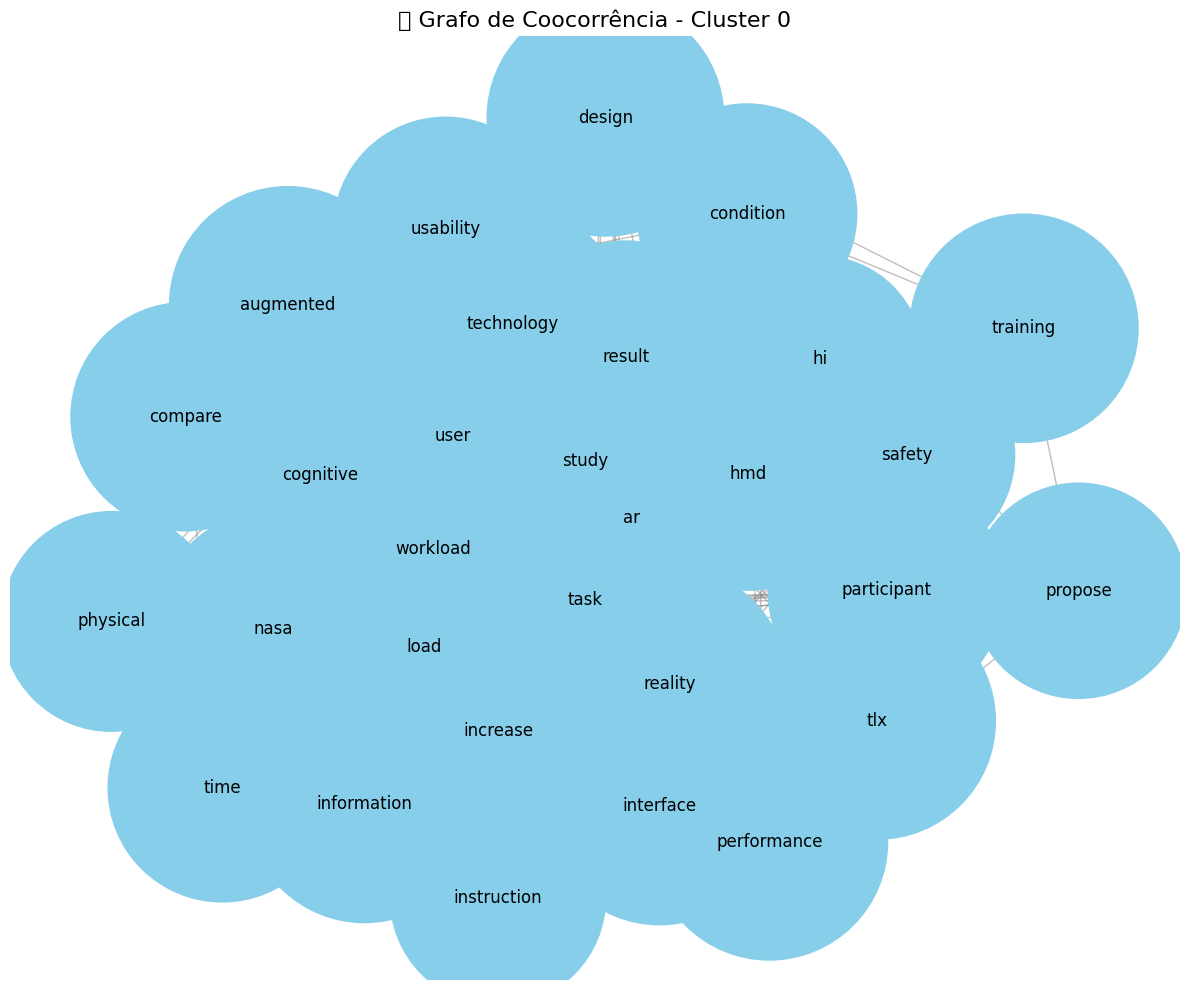

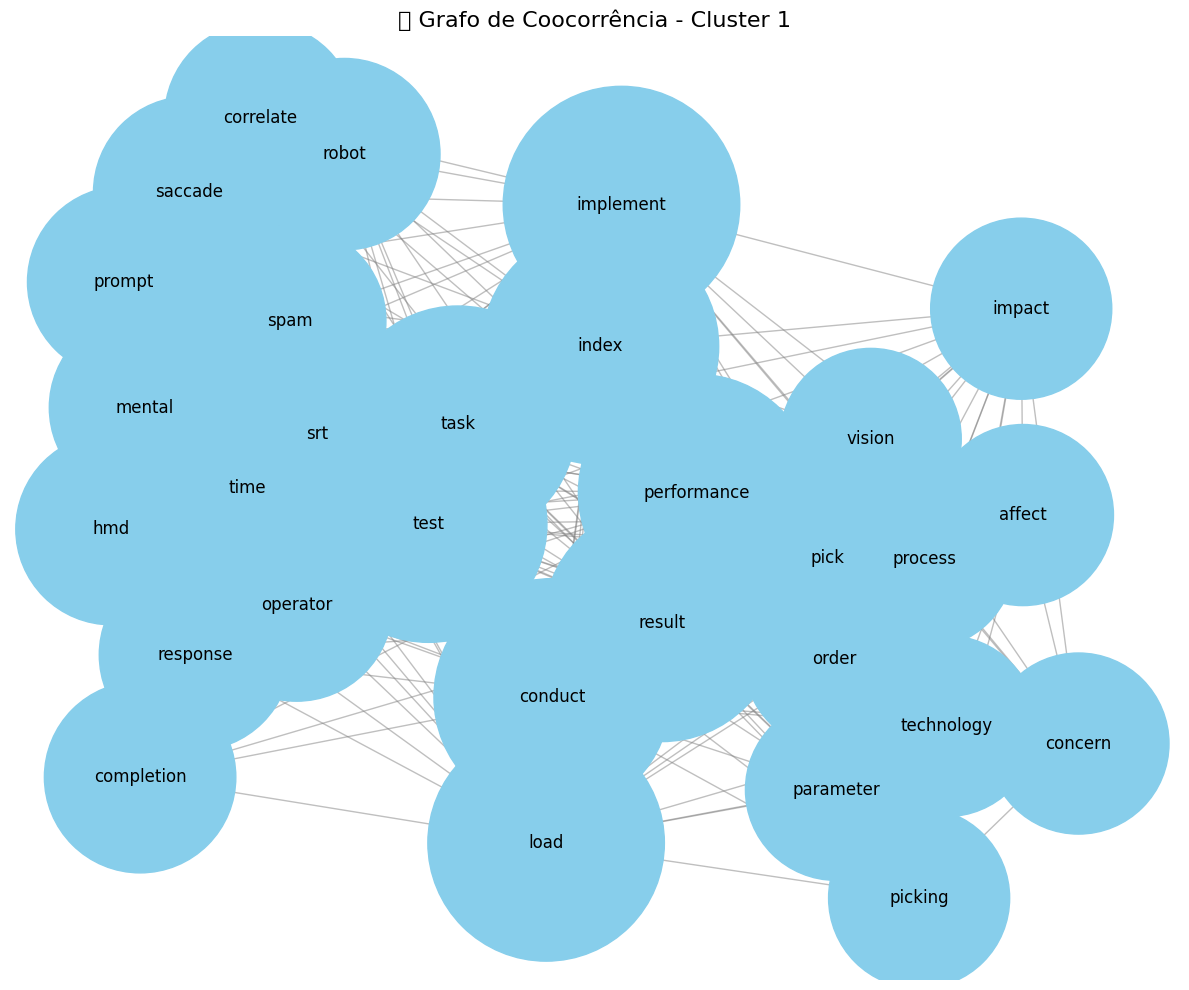

In [ ]:
grafo_coocorrencia_melhorado(cluster_id=0, top_n=30, peso_minimo=2)
grafo_coocorrencia_melhorado(cluster_id=1, top_n=30, peso_minimo=1)  # menos rigoroso para poucos textos


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def grafo_palavras_centradas(cluster_id, top_n=30, peso_minimo=2, top_central=10):
    textos = df[df['cluster'] == cluster_id]['processed_abstract']

    # Vetorização
    vectorizer = CountVectorizer(max_features=top_n, stop_words='english')
    X_counts = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()
    cooc_matrix = (X_counts.T @ X_counts).toarray()

    # Construir grafo completo
    G = nx.Graph()
    for i in range(len(vocab)):
        for j in range(i + 1, len(vocab)):
            weight = cooc_matrix[i][j]
            if weight >= peso_minimo:
                G.add_edge(vocab[i], vocab[j], weight=weight)

    # Calcular centralidade de grau (quantas conexões uma palavra tem)
    centralidade = nx.degree_centrality(G)

    # Selecionar apenas as palavras mais centrais
    palavras_mais_centradas = sorted(centralidade.items(), key=lambda x: x[1], reverse=True)[:top_central]
    palavras_nucleares = [p[0] for p in palavras_mais_centradas]

    # Criar subgrafo apenas com essas palavras
    subgrafo = G.subgraph(palavras_nucleares)

    # Visualização do subgrafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgrafo, k=0.6, seed=42)

    # Destacar os nós mais centrais
    central_values = [centralidade[n] for n in subgrafo.nodes()]
    nx.draw_networkx_nodes(subgrafo, pos, node_color='lightgreen', node_size=[v * 3000 for v in central_values])
    nx.draw_networkx_edges(subgrafo, pos, width=1.5, alpha=0.5)
    nx.draw_networkx_labels(subgrafo, pos, font_size=12, font_weight='bold')

    plt.title(f"Grafo Estratégico por Centralidade – Cluster {cluster_id}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


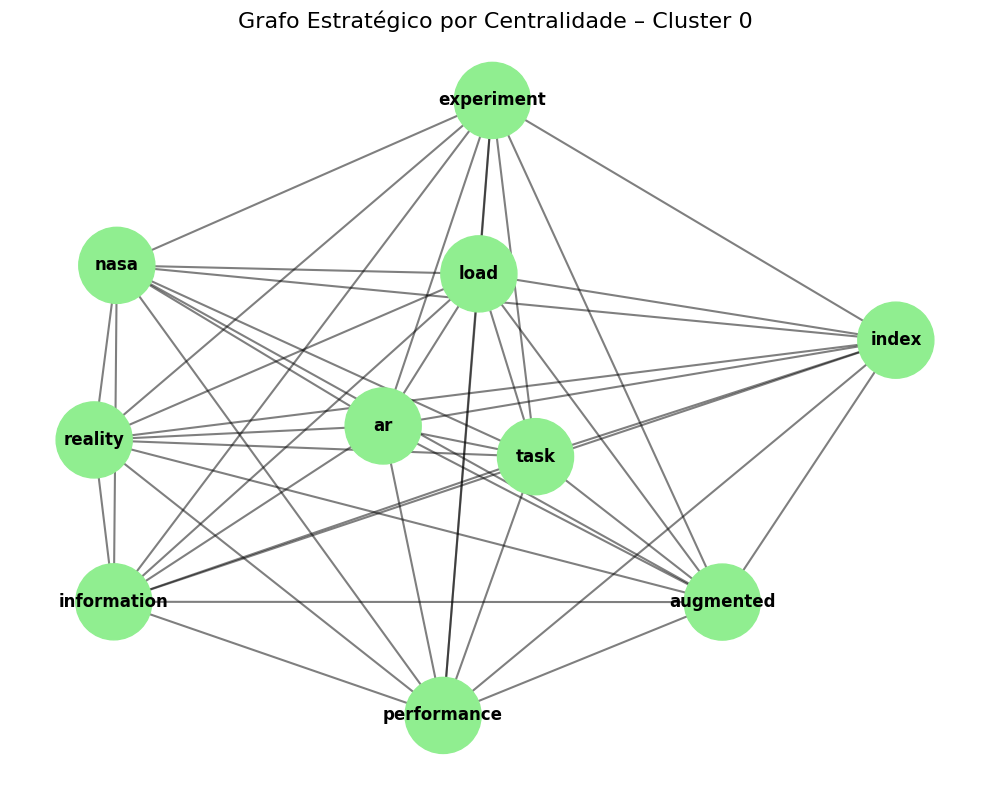

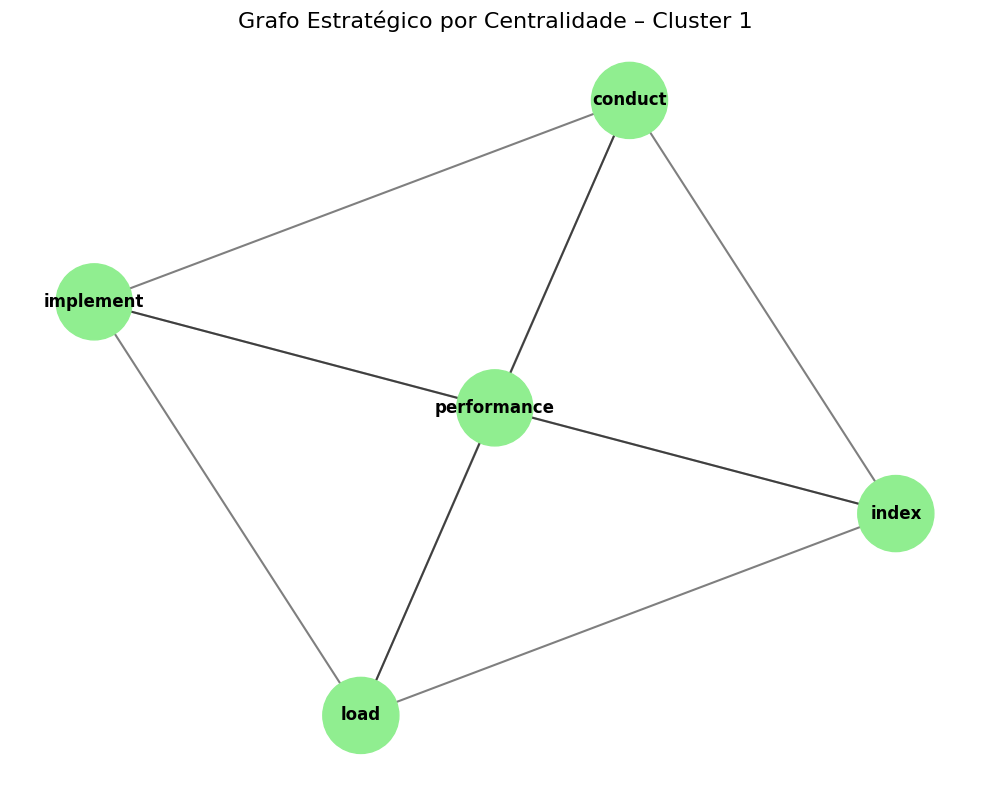

In [ ]:
grafo_palavras_centradas(cluster_id=0, top_n=50, peso_minimo=2, top_central=10)
grafo_palavras_centradas(cluster_id=1, top_n=30, peso_minimo=1, top_central=5)